<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Inferencia e Hipótesis</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En este desafío validaremos nuestros conocimientos aprendidos de regresión lineal. Para lograrlo, necesitarás aplicar los modelos aprendidos en clase, utilizando de apoyo el archivo fish.csv.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la longitud y ancho del pez.<br>
El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez individual y contiene varias columnas con información relevante. Las dimensiones del pez y otros atributos en el conjunto de datos podrían incluir:<br>
Species: La especie del pez.<br>
Weight: El peso del pez, que es la variable que se intenta predecir.<br>
Length1, Length2, Length3: Diferentes longitudes del pez.<br>
Height: Altura del pez.<br>
Width: Ancho del pez.<br>
Los datos en este archivo permiten realizar análisis estadísticos y modelado predictivo para determinar cómo las dimensiones del pez están relacionadas con su peso. Esto puede ser útil en la industria pesquera y en la investigación científica para comprender mejor las relaciones entre las características físicas de los peces y su peso. Para esto se te solicita:<br>
</span>

In [284]:
# Se importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from statistics import mode
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
# Se lee el archivo csv: earnings.csv
df = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/Fish.csv', delimiter = ',')
# Se crea un colormap personalizado
colores_base = ["#ADD8E6", "#E0BBE4", "#957DAD", "#D291BC", "#F4B3C2"]
paleta_gradual = LinearSegmentedColormap.from_list("PastelGradual", colores_base, N=20)

In [286]:
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


##### <span style="font-size:15px;">Se observan 07 columnas</span>

In [289]:
# Buena práctica: se observa el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [291]:
# Se determinan valores nulos
df.apply(lambda x: sum(x.isnull()), axis=0)

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<span style="font-size:15px;">Se observa que 06 de las 07 columnas son del tipo de dato float64. Sólo 1 columna es tipo ojbect
Se observan 0 registros nulos</span>

In [294]:
# Buena práctica: se genera un resumen estadístico para las 06 columnas numéricas con df.describe()
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [296]:
# Se analiza la correlación entre las columnas numéricas
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.</span>
<span style="font-size:15px;">Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr2, donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.</span><br>

In [299]:
# El radio se calculará como 1/2 de Width
df['Radio']=df['Width']/2
# Volumen calculado como π * (Radio)^2 * Height
df['Volumen'] = np.pi * (df['Radio'] ** 2) * df['Width']
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Radio,Volumen
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,2.01000,51.023241
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,2.15280,62.688939
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,2.34805,81.339573
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,2.22775,69.467109
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,2.56700,106.281451
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0.69680,2.125711
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0.63450,1.604999
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0.62790,1.555433
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,1.03360,6.938049


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.
</span><br>

In [302]:
# Se analiza la correlación entre las columnas numéricas
print("Matriz de correlación:")
matriz_correlacion = df.corr(numeric_only=True)
matriz_correlacion

Matriz de correlación:


,Weight,Length1,Length2,Length3,Height,Width,Radio,Volumen
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.886507,0.890048
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.867050,0.781762
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.873547,0.784208
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.878520,0.775976
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.792881,0.668349
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,1.000000,0.927304
Radio,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,1.000000,0.927304
Volumen,0.890048,0.781762,0.784208,0.775976,0.668349,0.927304,0.927304,1.000000


<span style="font-size:15px;">La correlación entre dos variables se calcula utilizando el coeficiente de correlación de Pearson. Este coeficiente mide la relación lineal entre dos viariables con valores que oscilan entre +1 [Correlación positiva perfecta], 0 [Sin Correlación lineal], -1 [Correlación negativa perfecta]<br>
La correlación entre peso y las longitudes están en torno a 0.92, pudiéndose considerar como una correlación positiva alta<br>
La correlación entre peso y altura es de 0.72, manteniéndose positiva pero inferior respecto a las longitudes<br>
La correlación entre peso y ancho es aproximadamente 0.89 siendo menor que la de las longitudes, superior a la altura pero muy similar a volumen, aunque esta última es levemente mejor respecto a Width, esto es 0.890 versus 0.886
</span><br>

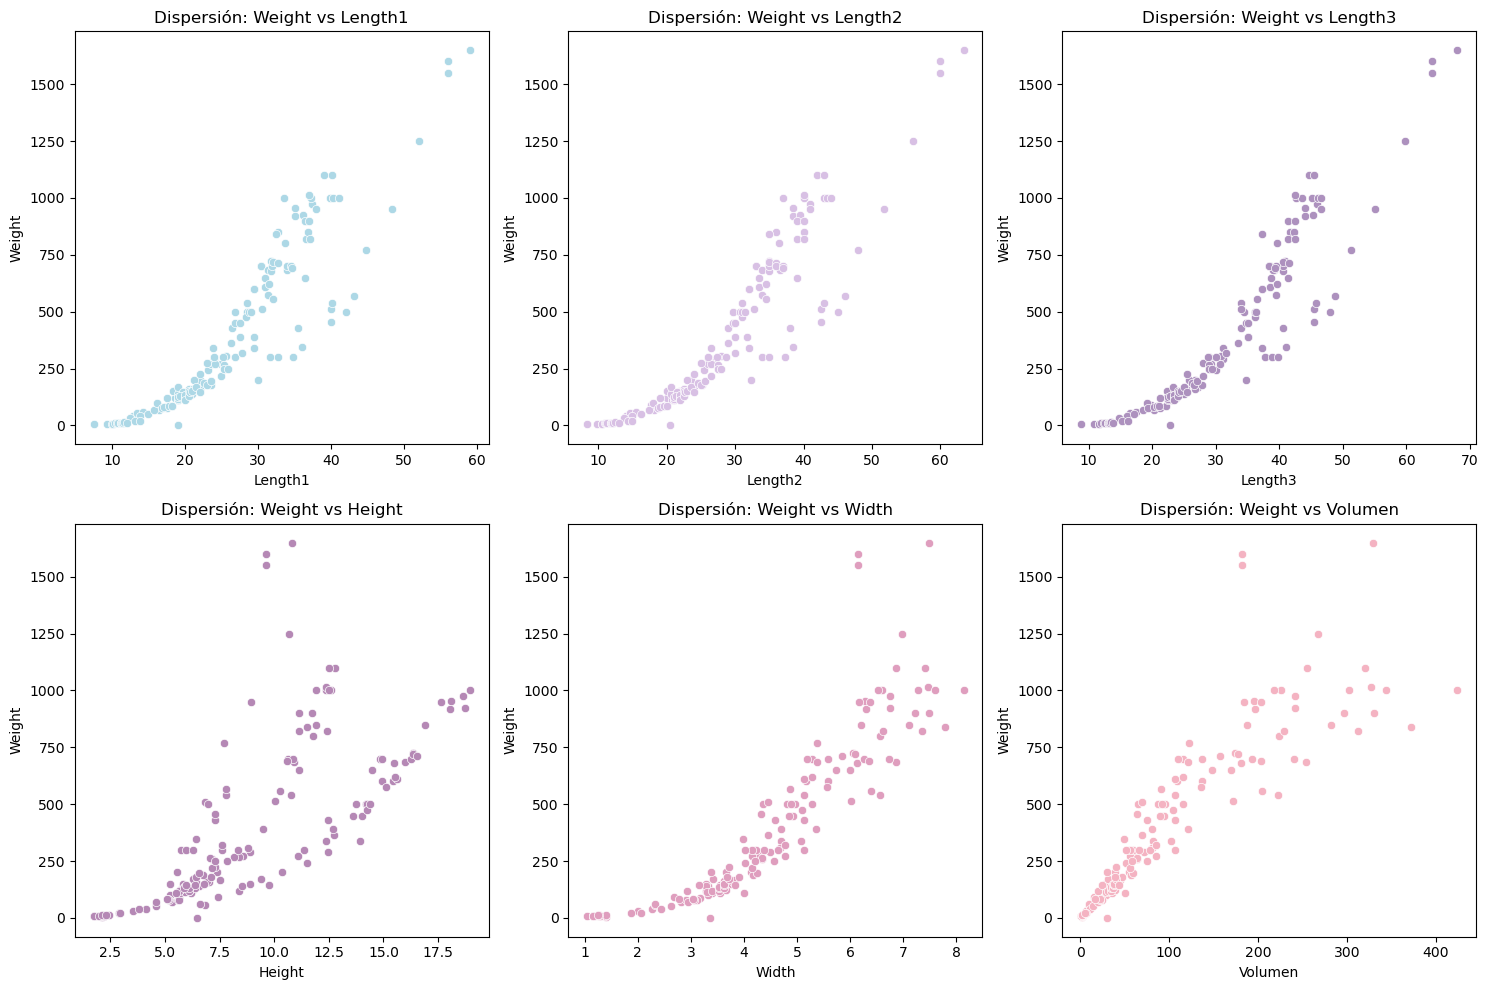

In [305]:
#Se explora gráficamente a través de disgramas de dispersión entre Weight y otras variables
variables = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volumen']
plt.figure(figsize=(15, 10))
num_colores = len(variables)
colores = [paleta_gradual(i) for i in np.linspace(0, 1, num_colores)]
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y='Weight', color=colores[i - 1])
    plt.title(f'Dispersión: Weight vs {var}')
    plt.xlabel(var)
    plt.ylabel('Weight')

plt.tight_layout()
plt.show()

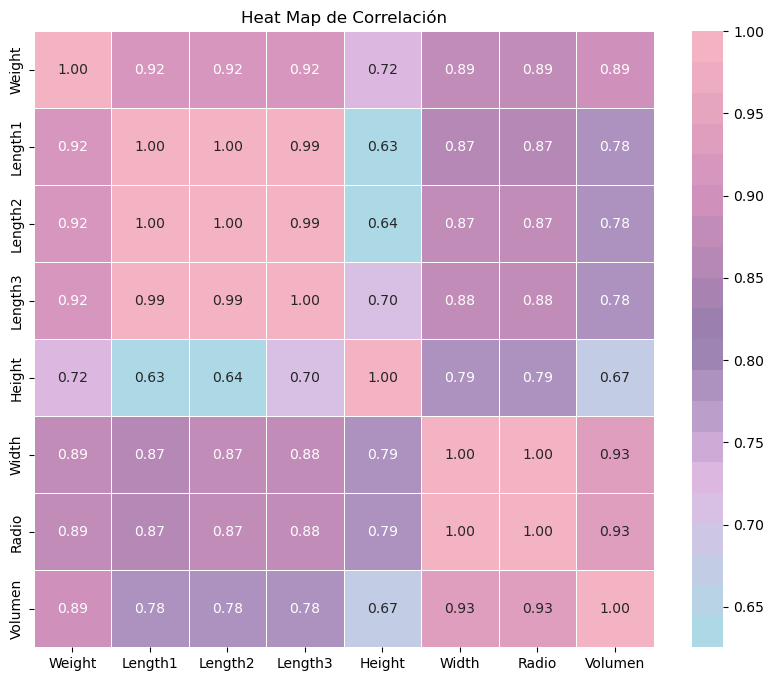

In [306]:
#Se explora gráficamente a través de una matriz de correlación con un heat map
plt.figure(figsize=(10,8))
sns.heatmap(
    matriz_correlacion,
    annot= True,           #Muesrtra los valorees en las celdas
    cmap= paleta_gradual,  #Utiliza la paleta de colores definida
    fmt=".2f",             #2 decimales
    cbar=True,             #Explicita la barra de referencia para color
    linewidths=0.5         #Ancho de las celdas
)
plt.title("Heat Map de Correlación")
plt.show()

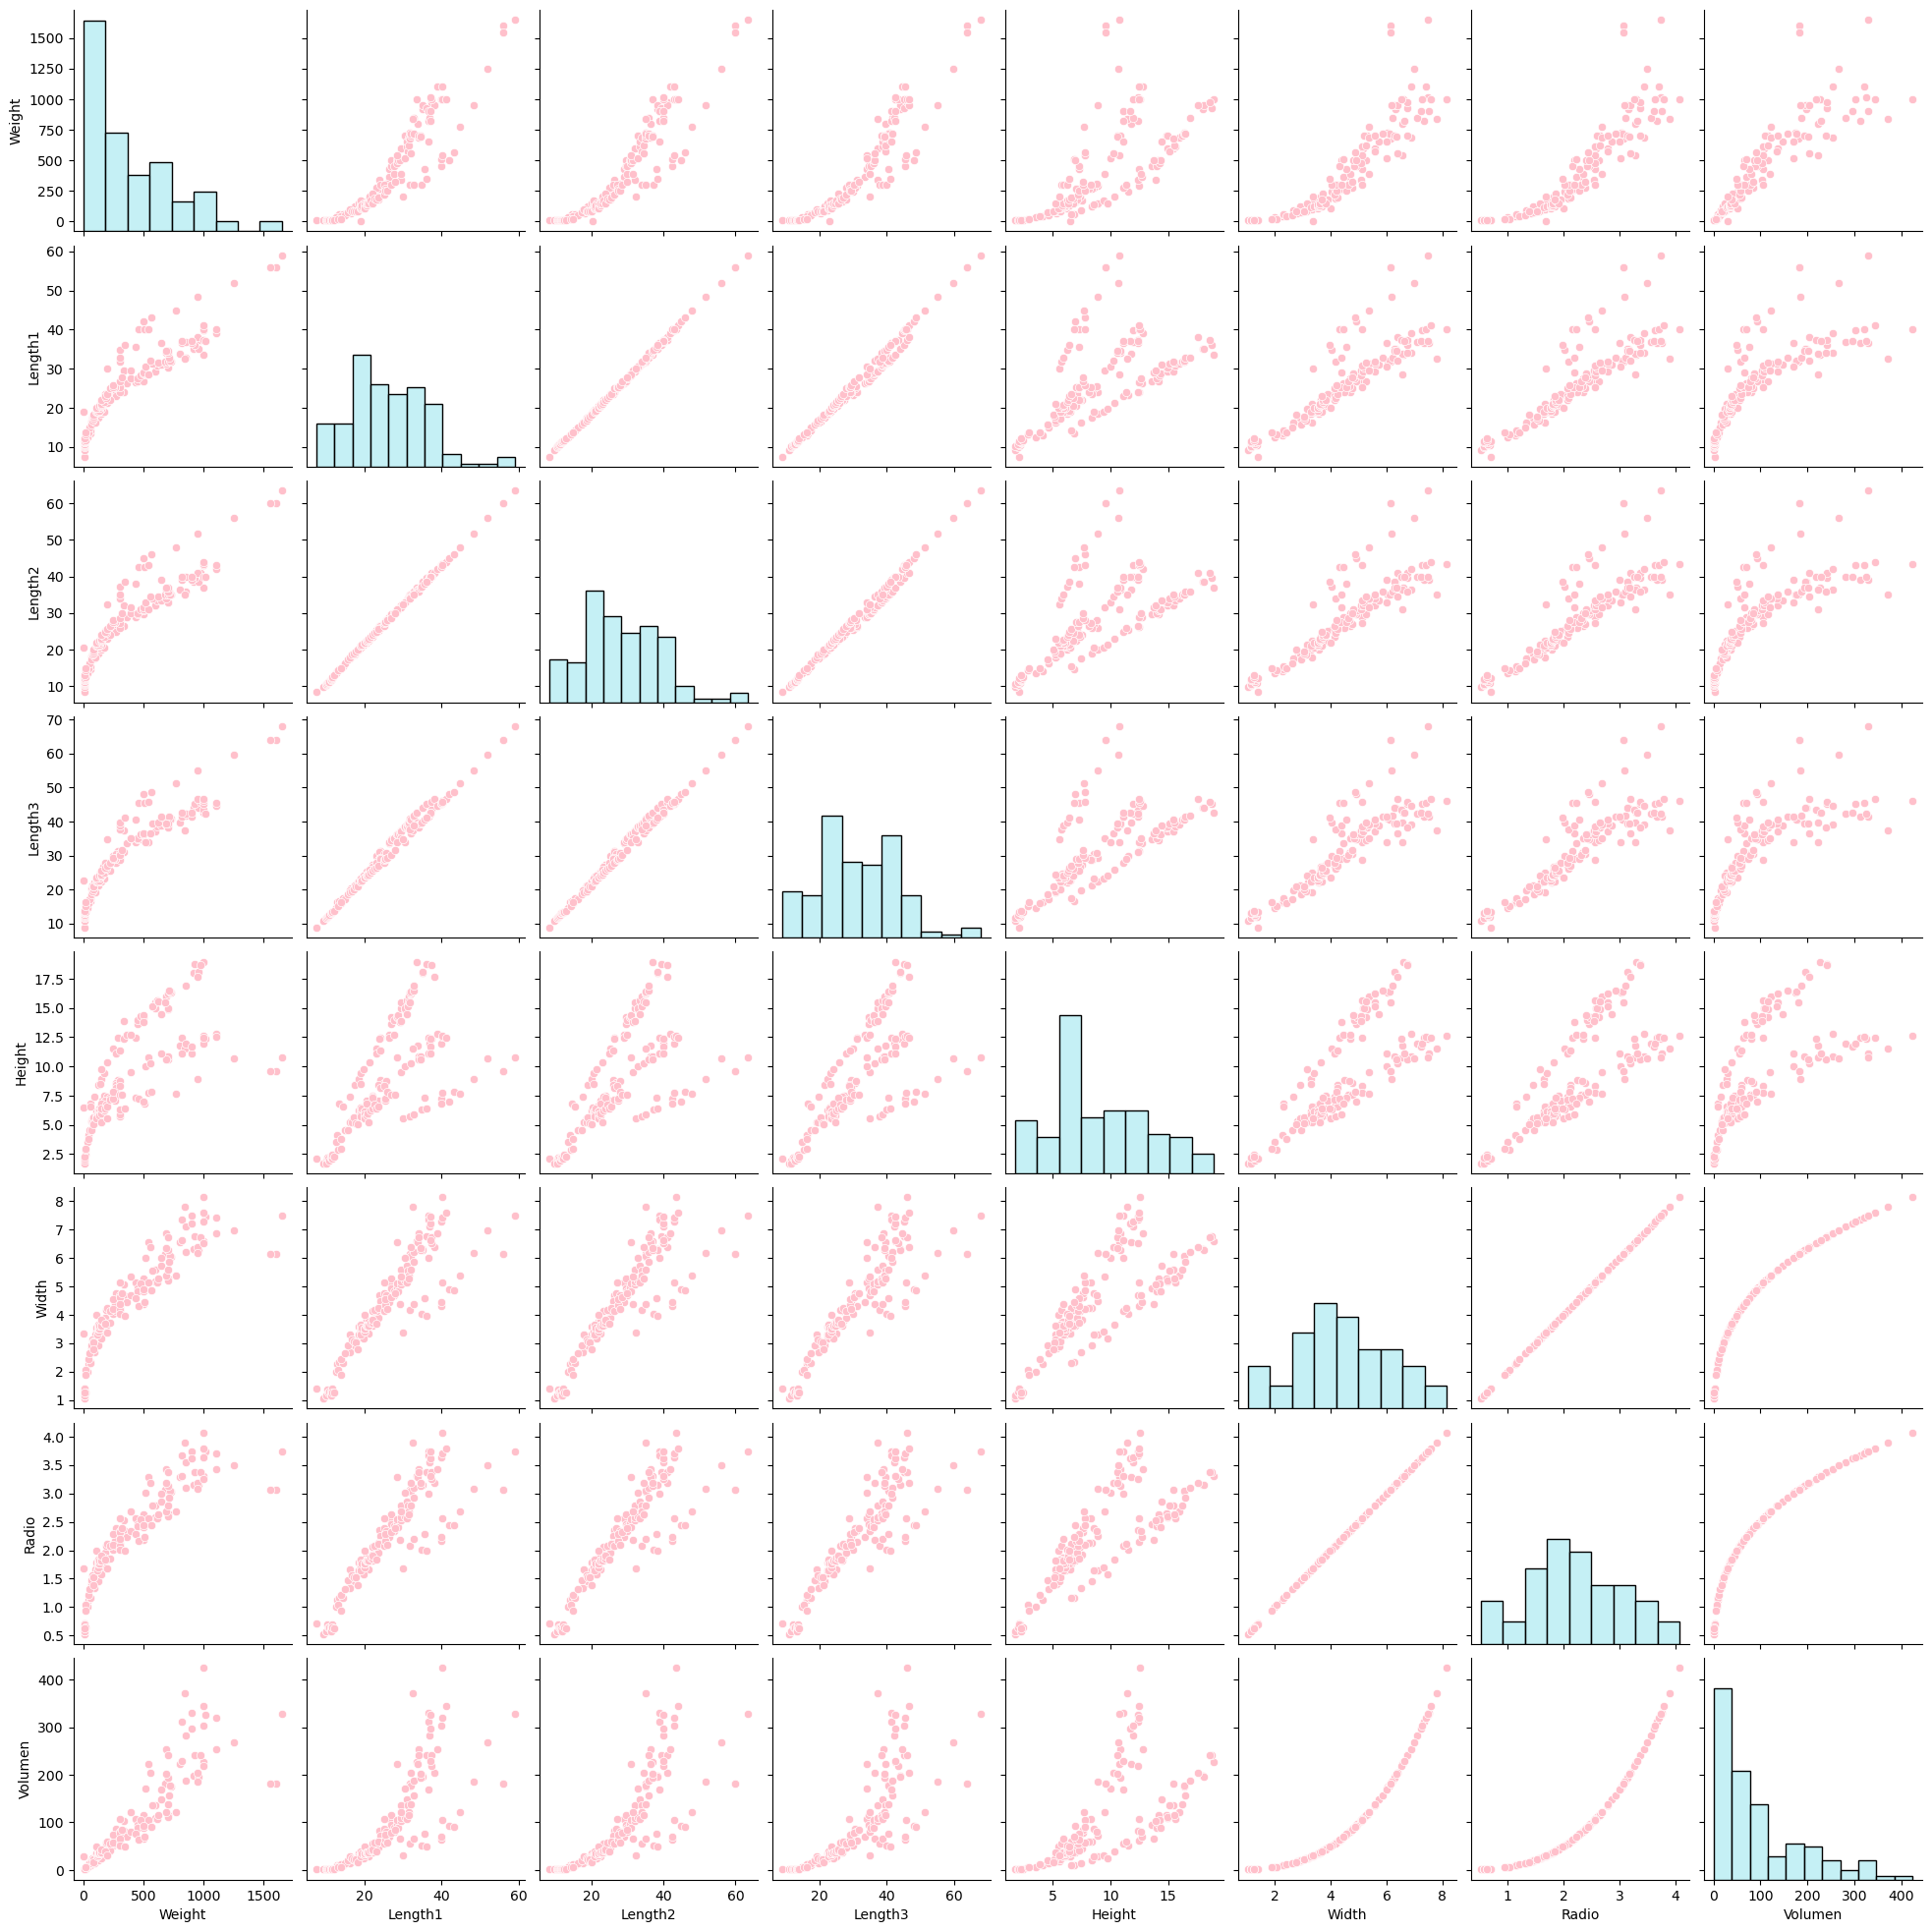

In [307]:
# Se explora gráficamente a través de Pairplot
sns.pairplot(df, diag_kind='hist', plot_kws={'color':'#FFC0CB'}, diag_kws={'color':'#B2EBF2'})

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.
</span><br>

Coeficiente de determinación (R^2): 0.79
Error cuadrático medio (MSE): 26463.52
Coeficiente de regresión (pendiente): 3.40
Intercepto: 67.74


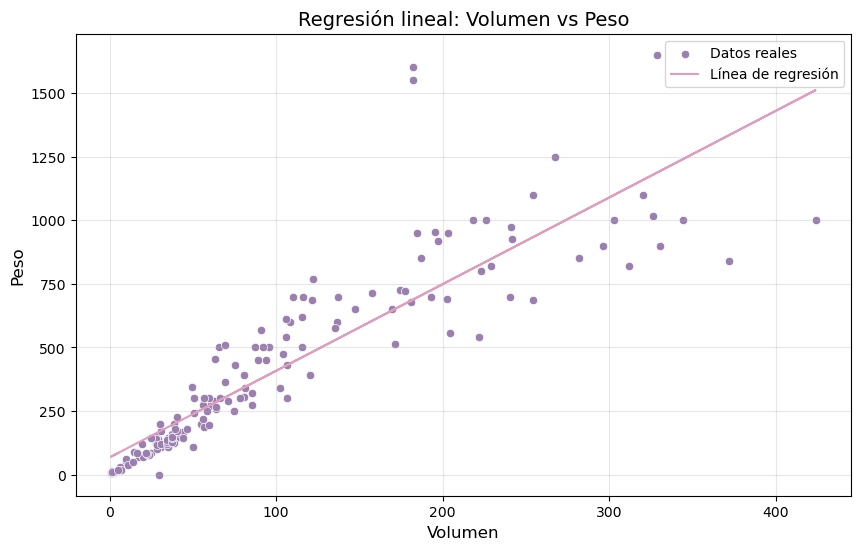

In [311]:
# Se Filtran datos para las columnas relevantes
df = df.dropna(subset=['Volumen', 'Weight'])  # Asegurarse de que no haya valores nulos
x = df[['Volumen']].values  # Variable independiente (Volumen)
y = df['Weight'].values     # Variable dependiente (Weight)

# Se Crea y ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)

# Predicciones
y_pred = model.predict(x)

# Evaluación del modelo
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Se explicitan los resultados
print(f"Coeficiente de determinación (R^2): {r2:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de regresión (pendiente): {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Se visualiza con la paleta pastel personalizada
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Volumen'], 
    y=df['Weight'], 
    label='Datos reales', 
    color=paleta_gradual(0.5)  # Color de la paleta (un punto intermedio)
)
plt.plot(
    df['Volumen'], 
    y_pred, 
    color=paleta_gradual(0.8),  # Otro tono de la paleta para la línea de regresión
    label='Línea de regresión'
)
plt.title('Regresión lineal: Volumen vs Peso', fontsize=14)
plt.xlabel('Volumen', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<span style="font-size:15px;">El R^2 = 0,79 indica que el modelo de regresión lienal explica el 79% de la variabilidad en el pesoo de los peces (y) a partir del volumen (x). Esto sugiere que el volumen es una variable predictora importante en del peso, pero no el único factor que lo determina. Hay un 21% de la variabilidad que no está explicada por el modelo y puede estar asociada a otras variables o factores considerados, como por ejemplo, la especie<br>
Un error cuadrático = 26.463,52 relativamente alto, lo que indica que las predicciones del modelo tienen una dispersión considerable respecto de los valores reales, esto podría sugerir: una variabiliad elevada de los datos; posible presencia de valoreese atípicos (outliers) que afectan el ajuste del modelo; que un modelo más complejo (como un modelo polinomial) podría ser necesario para captar mejor la relación no linean entre volumen y peso<br>
El coeficiente de pendiente = 3,40 representa el cambio esperado en el peso (y) por cada unidad adicional de volumen(x). En este caso, por cada aumento de una unidadd en el volumen del pez, su peso promedio se incrementa en aproximadamente 3,40 unidades. Esto confirma que existe una relación positiva entre el volumen y el peso de los peces, lo cual tiene sentido físico, ya que a mayor volumen, mayor debería ser el peso<br>
El intercepto = 67,74 es el valor estimado del peso cuando el volumen es igual a cero. Aunquee este valor tiene poco sentido práctico (un pez con volumen cero no debería tener peso), su inclusión en el modelo es necesaria para ajustar los datosde la mejor manera posible. Este resultado sugiere que podíra haber una relación no lienal o que el modelo lineal no captura perfectamente la realidad</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">4.</span>
<span style="font-size:15px;">¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.
</span><br>

Especies encontradas en los datos:
- Bream
- Roach
- Whitefish
- Parkki
- Perch
- Pike
- Smelt


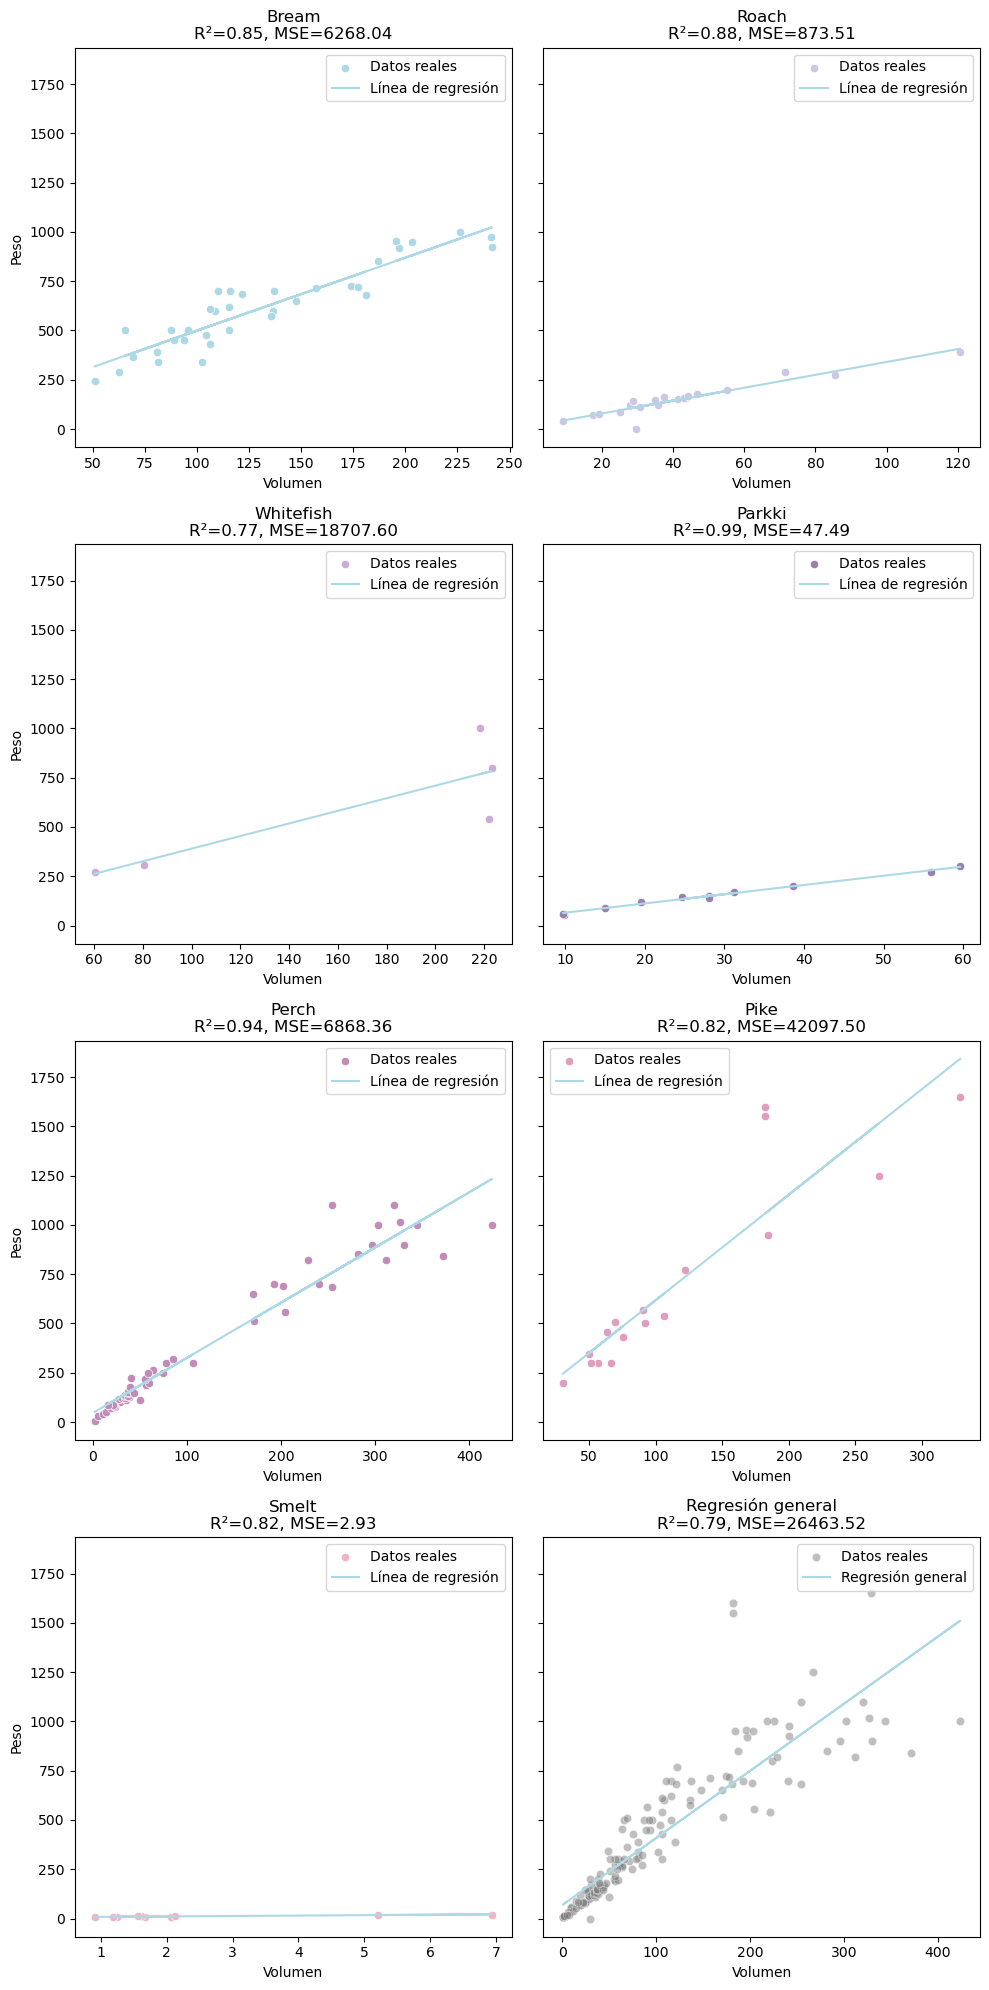

In [314]:
# Se obtienen las especies únicas
especies = df['Species'].unique()
print("Especies encontradas en los datos:")
for especie in especies:
    print(f"- {especie}")

# Se cuentan las especies
num_especies = len(especies)

# Se ajusta modelo general para todos los datos
x_general = df[['Volumen']].values
y_general = df['Weight'].values
modelo_general = LinearRegression()
modelo_general.fit(X_general, y_general)
y_general_pred = modelo_general.predict(X_general)
r2_general = r2_score(y_general, y_general_pred)
mse_general = mean_squared_error(y_general, y_general_pred)

# Se configuran gráficos con 2 gráficos por fila, más uno adicional
num_columnas = 2
num_filas = int(np.ceil((num_especies + 1) / num_columnas))  # +1 para el gráfico adicional
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 5 * num_filas), sharey=True)
axes = axes.flatten()  # Aplanar para facilitar la iteración

# Se extrae colores de la paleta gradual
colores = paleta_gradual(np.linspace(0, 1, num_especies))

# Se itera sobre cada especie y ajusta un modelo de regresión lineal
for i, especie in enumerate(especies):
    ax = axes[i]
    datos_especie = df[df['Species'] == especie]
    
    X = datos_especie[['Volumen']].values
    y = datos_especie['Weight'].values

    # Se ajusta modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    # Se evalúa el modelo
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Se grafica
    sns.scatterplot(x=X.flatten(), y=y, ax=ax, color=colores[i], label='Datos reales')
    ax.plot(X, y_pred, color='#ADD8E6', label='Línea de regresión')
    ax.set_title(f'{especie}\nR²={r2:.2f}, MSE={mse:.2f}')
    ax.set_xlabel('Volumen')
    ax.set_ylabel('Peso' if i % num_columnas == 0 else '')  # Etiqueta de eje Y en la primera columna
    ax.legend()

# Se agrega gráfico adicional para el modelo general
ax = axes[num_especies]
sns.scatterplot(x=X_general.flatten(), y=y_general, ax=ax, color='gray', alpha=0.5, label='Datos reales')
ax.plot(X_general, y_general_pred, color='#ADD8E6', label='Regresión general')
ax.set_title(f'Regresión general\nR²={r2_general:.2f}, MSE={mse_general:.2f}')
ax.set_xlabel('Volumen')
ax.set_ylabel('Peso')
ax.legend()

# Se ocultan gráficos adicionales si hay menos especies + 1 que espacios en el diseño
for j in range(num_especies + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


<span style="font-size:15px;">Separar el análisis por especie mejora significativamente la capacidad del modelo para predecir el peso a partir del volumen. Esto resalta la importancia de considerar características categóricas (como la especie) al construir modelos de predicción. Sin embargo, para especies con menor cantidad de datos o mayor dispersión, puede ser necesario aplicar enfoques más robustos o combinar otros factores además del volumen para mejorar la predicción.</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">5.</span>
<span style="font-size:15px;">Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.</span><br>

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Radio', 'Volumen'],
      dtype='object')
Evaluación del modelo:
- R² (entrenamiento): 0.96
- MSE (entrenamiento): 5389.49
- R² (prueba): 0.95
- MSE (prueba): 7538.51

Coeficientes del modelo:
- Length1: -77.85
- Length2: 97.31
- Length3: 2.54
- Height: 17.97
- Width: -173.27
- Volumen: 3.30
Intercepto: -121.44


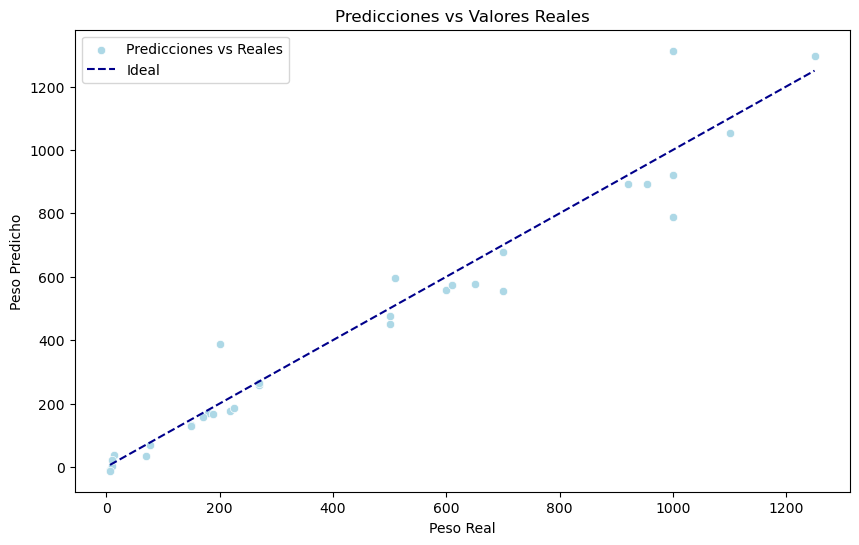

In [317]:
print(df.columns)
# Filtrar datos para las columnas relevantes y eliminar valores nulos
variables_independientes = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volumen']

x = df[variables_independientes]  # Variables independientes
y = df['Weight']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Realizar predicciones
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluar el modelo
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Mostrar resultados
print("Evaluación del modelo:")
print(f"- R² (entrenamiento): {r2_train:.2f}")
print(f"- MSE (entrenamiento): {mse_train:.2f}")
print(f"- R² (prueba): {r2_test:.2f}")
print(f"- MSE (prueba): {mse_test:.2f}")
print("\nCoeficientes del modelo:")
for var, coef in zip(variables_independientes, model.coef_):
    print(f"- {var}: {coef:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Visualización de resultados en el conjunto de prueba
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color="#ADD8E6", label="Predicciones vs Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="darkblue", linestyle="--", label="Ideal")
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Peso Real")
plt.ylabel("Peso Predicho")
plt.legend()
plt.show()
